# Определение перспективного тарифа для телеком-компании

Цель исследования — определить какой тариф из двух приносит бо́льшую прибыль, чтобы скорректировать рекламный бюджет.

## Изучение данных

Начнём с импорта библиотек:

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
import numpy as np
import pandas as pd
from scipy import stats as st

# увеличим максимальное количество колонок для отображения
pd.options.display.max_columns = 15

Загрузим и изучим данные:

In [1]:
df_calls = pd.read_csv('/datasets/calls.csv')
display(df_calls.head(10))
df_internet = pd.read_csv('/datasets/internet.csv')
display(df_internet.head(10))
df_messages = pd.read_csv('/datasets/messages.csv')
display(df_messages.head(10))
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
display(df_tariffs.head(10))
df_users = pd.read_csv('/datasets/users.csv')
display(df_users.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Изучим общие сведенья:

In [2]:
print('Calls')
df_calls.info()
print('\nInternet')
df_internet.info()
print('\nMessages')
df_messages.info()
print('\nTariffs')
df_tariffs.info()
print('\nUsers')
df_users.info()

Calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Tariffs
<class 

Проверим наличие дубликатов:

In [3]:
print('Users:', df_users.duplicated().sum())
print('Calls:', df_calls.duplicated().sum())
print('Messages:', df_messages.duplicated().sum())
print('Internet:', df_internet.duplicated().sum())

Users: 0
Calls: 0
Messages: 0
Internet: 0


Изучим значения уникальных колонок более детально:

In [4]:
# Calls
print(f'Calls\nid: min — {df_calls["id"].min()}; max — {df_calls["id"].max()}')
print(f'call_date: min — {df_calls["call_date"].min()}; max — {df_calls["call_date"].max()}')
print(f'duration:\n{df_calls["duration"].describe()}')
print(f'user_id: min — {df_calls["user_id"].min()}; max — {df_calls["user_id"].max()}')
# Internet
print(
    f'\nInternet\n"Unnamed: 0": min — {df_internet["Unnamed: 0"].min()};'
    f'max — {df_internet["Unnamed: 0"].max()}'
)
print(f'mb_used:\n{df_internet["mb_used"].describe()}')
# Users
print(
    f'\nUsers\nage:\n{df_users["age"].describe()}'
)
print('churn_date:', df_users["churn_date"].unique()[:5])
print('tariff:', df_users["tariff"].unique())

Calls
id: min — 1000_0; max — 1499_99
call_date: min — 2018-01-01; max — 2018-12-31
duration:
count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64
user_id: min — 1000; max — 1499

Internet
"Unnamed: 0": min — 0;max — 149395
mb_used:
count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Users
age:
count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64
churn_date: [nan '2018-10-05' '2018-12-18' '2018-11-21' '2018-10-03']
tariff: ['ultra' 'smart']


Из документации к данным **таблица calls (информация о звонках):**
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

**Таблица internet (информация об интернет-сессиях):**
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

**Таблица messages (информация о сообщениях):**
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

**Таблица tariffs (информация о тарифах):**
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Таблица users (информация о пользователях):**
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tariff` — название тарифного плана

**Вывод**

В таблицах `calls`, `internet` и `messages` нет пропусков, они очень похожи между собой, некоторые колонки полностью повторяются. Дубликатов ни в одной из таблиц не было обнаружено. Каждая строчка в таблицах содержит информацию об одном действие: звонке или сообщении, а в случае с интернетом — об одной сессии, коих в день может быть несколько. Таблица `tariffs` имеет всего две строчки: информацию о тарифе "Смарт" и "Ультима". В таблице `users` собрана информация по каждому пользователю, имеются пропуски в столбце `churn_date`, но эти пропуски означают, что тариф не был отключён пользователем.

Обнаруженные проблемы:
- В таблице `internet` есть лишняя колонка `Unnamed: 0`, она полностью повторяет индексацию строк.
- В таблице `calls` колонку `duration` нужно перевести в integer, при этом округлив в бо́льшую сторону.
- В таблице `internet` колонку `mb_used` нужно перевести в гигабайты, при этом округлив в бо́льшую сторону.
- В таблицах `calls`, `internet`, `sessions` и `users` нужно перевести даты в DateTime, кроме столбца `churn_date`, так как он содержит пропуски.
- В таблицах `calls`, `internet` и `messages` колонка `id` избыточна, так как `user_id` уже присутствует.

Для дальйнешего исследования нам нужно исправить все проблемы, чтобы работать с данными было удобно.

## Подготовка данных

### Приведение к нужным типам данных

Как мы помним колонку `duration` нам нужно округлить в бо́льшую сторону, поэтому вещественный тип в данном случае излишен, как и в колонке `mb_used`, давайте для начала округлим, а после переведём в `duration` и `mb_used` к целочисленному типу:

In [5]:
# округлим колонку duration в бо́льшую сторону
df_calls['duration'] = np.ceil(df_calls['duration'])
# переведём все колонки из вещественных в целочисленные
df_calls['duration'] = df_calls['duration'].astype('int')
df_internet['mb_used'] = df_internet['mb_used'].astype('int')

Теперь переведём все даты из строковых типов в DateTime:

In [6]:
date_format = '%Y-%m-%d'
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format=date_format)
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format=date_format)
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format=date_format)
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format=date_format)

Проверим проделанную работу:

In [7]:
print('Calls')
df_calls.info()
print('\nInternet')
df_internet.info()
print('\nMessages')
df_messages.info()
print('\nUsers')
df_users.info()

Calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB

Internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB

Messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64

### Исправление ошибок

Удалим избыточные столбцы:

In [8]:
del df_calls['id']
del df_messages['id']
del df_internet['id']
del df_internet['Unnamed: 0']

### Рассчёт значений

#### Сообщения, звонки и трафик

Для начала рассчитаем количетсво звонков, сообщений и потраченного трафика в месяц для каждого клиента, для этого давайте добавим столбцы с месяцами в таблицы:

In [9]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

Теперь исключим из выборки нулевые звонки и сгруппируем данные по пользователю и по месяцу, не забудем переименовать колонки, чтобы было удобнее пользоваться новой таблицей:

In [10]:
df_month_calls = df_calls[df_calls['duration'] > 0].pivot_table(
    index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']
)
df_month_calls.columns = ['calls_count', 'duration_calls']

Сгруппируем так же потраченный трафик для каждого из пользователей, количество сессий нас не интересует, поэтому будем считать только сумму:

In [11]:
df_month_internet = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')

Посчитаем количество сообщений для каждого пользователя и переменуем колонку:

In [12]:
df_month_messages = df_messages.pivot_table(index=['user_id', 'month'], aggfunc='count')
df_month_messages.columns = ['messages_count']

Соединим полученные значения в одну таблицу, чтобы не потерять никакие значения будем использовать внешнее соединение и посмотрим на полученный результат:

In [13]:
df_month = df_month_messages.merge(df_month_internet, how='outer', on=['user_id', 'month'])
df_month = df_month.merge(df_month_calls, how='outer', on=['user_id', 'month'])
df_month

messages_count  mb_used  calls_count  duration_calls
user_id month                                                      
1000    5                22.0   2252.0         17.0           159.0
        6                60.0  23213.0         28.0           172.0
        7                75.0  13988.0         41.0           340.0
        8                81.0  14043.0         42.0           408.0
        9                57.0  14556.0         46.0           466.0
...                       ...      ...          ...             ...
1494    8                 NaN   6580.0         26.0           262.0
        9                 NaN  16939.0         57.0           501.0
        10                NaN  17741.0         45.0           354.0
        11                NaN  18034.0         46.0           411.0
        12                NaN  17601.0         54.0           418.0

[3214 rows x 4 columns]

Добавим в таблицу `users` для каждого пользователя месяц: 

In [14]:
df_users_month = pd.DataFrame({
    'user_id': [user_id for user_id in range(1000, 1500) for _ in range(12)],
    'month': [month for _ in range(500) for month in range(1, 13)],
})
df_users = df_users.merge(df_users_month, on='user_id')

Добавим рассчитанные значения в таблицу `users`:

In [15]:
df_users = df_users.merge(df_month, on=['user_id', 'month'])

Посчитаем пропуски:

In [16]:
df_users.isna().mean()

user_id           0.000000
age               0.000000
churn_date        0.941817
city              0.000000
first_name        0.000000
last_name         0.000000
reg_date          0.000000
tariff            0.000000
month             0.000000
messages_count    0.154636
mb_used           0.003423
calls_count       0.014312
duration_calls    0.014312
dtype: float64

В добавленных только что колонках отстутсвуют значения, потому что пользователь не использовал ту или иную функцию своего тарифа, поэтому пропуски можем смело заполнять нулями:

In [17]:
df_users.loc[df_users['messages_count'].isna(), 'messages_count'] = 0
df_users.loc[df_users['mb_used'].isna(), 'mb_used'] = 0
df_users.loc[df_users['calls_count'].isna(), 'calls_count'] = 0
df_users.loc[df_users['duration_calls'].isna(), 'duration_calls'] = 0

После проделанных вычислений наши столбцы снова изменили тип, давайте вернём его обратно:

In [18]:
df_users['messages_count'] = df_users['messages_count'].astype('int')
df_users['mb_used'] = df_users['mb_used'].astype('int')
df_users['calls_count'] = df_users['calls_count'].astype('int')
df_users['duration_calls'] = df_users['duration_calls'].astype('int')

Посмотрим, что получилось:

In [19]:
df_users.head(30)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,messages_count,mb_used,calls_count,duration_calls
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,2252,17,159
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,60,23213,28,172
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,75,13988,41,340
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,81,14043,42,408
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,57,14556,46,466
5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10,73,14690,44,350
6,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11,58,14745,37,338
7,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,70,9808,38,333
8,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11,0,18405,45,430
9,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,12,0,14018,47,414


#### Выручка

Теперь давайте рассчитаем помесячную выручку с каждого пользователя, для этого напишем функцию:

In [20]:
def get_income(row):
    """ Рассчитывает и возвращает выручку за определённый месяц,
        на вход принимает строку таблицы.
    """
    # вычисляем тариф и связаные с тарифом стоимости услуг
    tariff = df_tariffs[df_tariffs['tariff_name'] == row['tariff']]
    rub_monthly = tariff['rub_monthly_fee']
    rub_per_gb = tariff['rub_per_gb']
    rub_per_message = tariff['rub_per_message']
    rub_per_minute = tariff['rub_per_minute']
    minutes = tariff['minutes_included']
    mb_per_month = tariff['mb_per_month_included']
    messages = tariff['messages_included']
    # статистика за месяц пользования
    messages_count = row['messages_count']
    mb_used = row['mb_used']
    minutes_count = row['duration_calls']
    # считаем результат
    minutes_rub = (minutes_count - minutes) * rub_per_minute if (minutes_count > minutes).bool() else 0
    gigabytes_rub = np.ceil((mb_used - mb_per_month) / 1024) * rub_per_gb if (mb_used > mb_per_month).bool() else 0
    messages_rub = (messages_count - messages) * rub_per_message if (messages_count > messages).bool() else 0
    return int(rub_monthly) + int(minutes_rub) + int(gigabytes_rub) + int(messages_rub)

Добавим доходность по каждому месяцу в таблицу:

In [21]:
df_users['income'] = df_users.apply(get_income, axis=1)

Посмотрим первые десять строчек таблицы, чтобы проверить проделанную работу:

In [22]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,messages_count,mb_used,calls_count,duration_calls,income
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,2252,17,159,1950
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,60,23213,28,172,1950
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,75,13988,41,340,1950
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,81,14043,42,408,1950
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,57,14556,46,466,1950
5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10,73,14690,44,350,1950
6,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11,58,14745,37,338,1950
7,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,70,9808,38,333,1950
8,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11,0,18405,45,430,1150
9,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,12,0,14018,47,414,550


## Анализ результатов

Давайте посчитаем для каждого тарифа в месяц среднее значение, стандартное отклонение и дисперсию для количества сообщений, длины звонков и использованного трафика:

In [23]:
month_statistics = df_users.pivot_table(
    index='tariff',
    values=['messages_count', 'duration_calls', 'mb_used'],
    aggfunc=['mean', 'var', 'std']
)
month_statistics

mean                                         var  \
       duration_calls       mb_used messages_count duration_calls   
tariff                                                              
smart      417.934948  16187.578735      33.384029   36219.315784   
ultra      526.623350  19450.643655      49.363452  100873.633397   

                                               std                \
             mb_used messages_count duration_calls       mb_used   
tariff                                                             
smart   3.437981e+07     796.812958     190.313730   5863.430302   
ultra   1.015661e+08    2285.266143     317.606098  10077.999744   

                       
       messages_count  
tariff                 
smart       28.227876  
ultra       47.804457

Переименуем столбцы для удобства:

In [24]:
month_statistics.columns = [
    'mean_duration_calls', 'mean_mb_used', 'mean_messages_count',
    'var_duration_calls', 'var_mb_used', 'var_messages_count',
    'std_duration_calls', 'std_mb_used', 'std_messages_count',
]

Посчитаем насколько процентнов средние значения в тарифе Ultra превышают тариф Smart:

In [25]:
difference_percentage = (
    1 - month_statistics.loc['smart', 'mean_messages_count']
    / month_statistics.loc['ultra', 'mean_messages_count']
)
print(f'Ultra mean_messages_count exceed smart about: {difference_percentage:.2%}')
difference_percentage = (
    1 - month_statistics.loc['smart', 'mean_duration_calls']
    / month_statistics.loc['ultra', 'mean_duration_calls']
)
print(f'Ultra mean_duration_calls exceed smart about: {difference_percentage:.2%}')
difference_percentage = (
    1 - month_statistics.loc['smart', 'mean_mb_used']
    / month_statistics.loc['ultra', 'mean_mb_used']
)
print(f'Ultra mean_mb_used exceed smart about: {difference_percentage:.2%}')

Ultra mean_messages_count exceed smart about: 32.37%
Ultra mean_duration_calls exceed smart about: 20.64%
Ultra mean_mb_used exceed smart about: 16.78%


Чтобы было удобно работать с каждым из тарифов давайте сделаем на них ссылки:

In [26]:
df_smart = df_users.query('tariff == "smart"')
df_ultra = df_users.query('tariff == "ultra"')

Давайте построим гистограммы, начнём с того, что сравним сколько сообщений отправляют пользователи обоих тарифов:

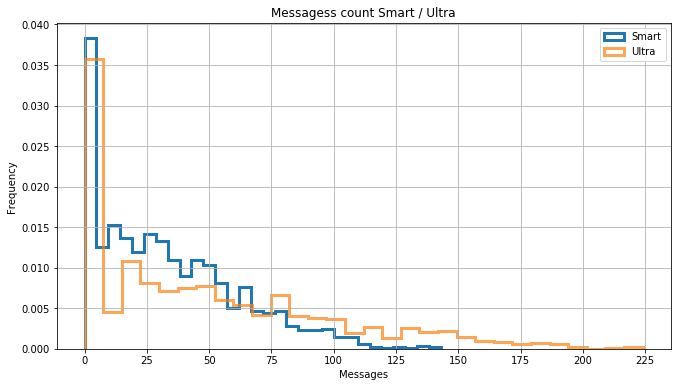

In [27]:
ax = df_smart['messages_count'].plot(
    kind='hist', bins=30, histtype='step', linewidth=3, density=True,
)
ax.set_xlabel('Messages')
ax.set_xticks([tick for tick in range(0, 250, 25)])
df_ultra['messages_count'].plot(
    kind='hist', bins=30, histtype='step', linewidth=3,
    title='Messagess count Smart / Ultra', figsize=(11, 6),
    alpha=0.7, legend=True, grid=True, density=True, ax=ax,
)
plt.legend(['Smart', 'Ultra'])

Сравним сколько минут в месяц пользователи тратят:

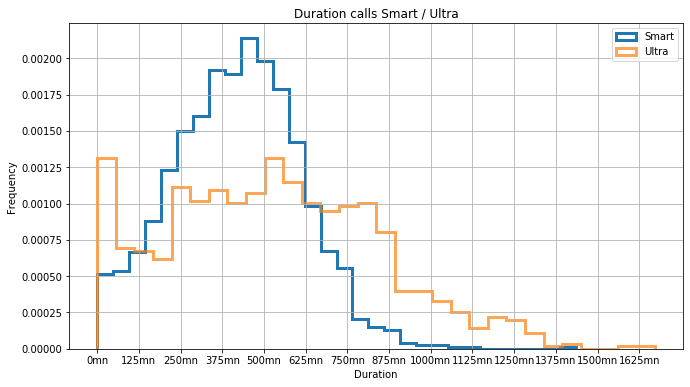

In [28]:
ax = df_smart['duration_calls'].plot(
    kind='hist', bins=30, histtype='step', linewidth=3, density=True,
)
ax.set_xlabel('Duration')
ax.set_xticks([tick for tick in range(0, 1750, 125)])
df_ultra['duration_calls'].plot(
    kind='hist', bins=30, histtype='step', linewidth=3,
    title='Duration calls Smart / Ultra', figsize=(11, 6),
    alpha=0.7, legend=True, grid=True, density=True, ax=ax,
)
plt.legend(['Smart', 'Ultra'])
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter(r'%dmn'))

Сравним сколько тратят трафика пользователи обоих тарифов:

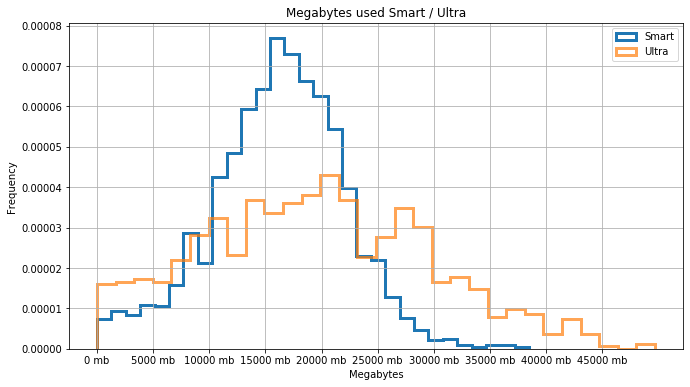

In [29]:
ax = df_smart['mb_used'].plot(
    kind='hist', bins=30, histtype='step', linewidth=3, density=True,
)
ax.set_xlabel('Megabytes')
ax.set_xticks([tick for tick in range(0, 50000, 5000)])
df_ultra['mb_used'].plot(
    kind='hist', bins=30, histtype='step', linewidth=3,
    title='Megabytes used Smart / Ultra', figsize=(11, 6),
    alpha=0.7, legend=True, grid=True, density=True, ax=ax,
)
plt.legend(['Smart', 'Ultra'])
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter(r'%d mb'))

**Вывод**

В среднем в месяц пользователи тарифа Ultra тратят на 32% больше сообщений, чем пользователи Smart. Такую же картину мы наблюдаем и с звонками, и с потраченным трафиком: на 21% больше у пользователей Ultra длительность звонков и на 17% больше потраченно мегабайт.

Стандартное отклонение и дисперсия тоже сильно отличаются, так как у Ultra разброс немного шире по всем трём критериям, что видно на графиках.

Многие пользователи в основном не пишут сообщения на обоих тарифах или пишут, но совсем не много, где-то до 50 сообщений в месяц. Пользователи тарифа Smart редко пишут от 50 до 100 сообщений в день, а от 100 почти никогда. На тарифе Ultra разброс намного шире и более плавный, примерно на 75 сообщениях графики начинают расходиться, Ultra намного плавнее спускается вниз, на данном тарифе чаще пишут от 50 до 150 сообщений, но встречаются и уникальные случаи, когда пишут более 150 сообщений.

Длина звонков на тарифе Ultra намного чаще равна нулю, чем на тарифе Smart, это означает, что пользователи тарифа Ultra чаще сбрасывают или не отвечают на звонки. Пользователи Smart чаще всего тратят около 500 минут в месяц, пользователи Ultra тоже имеют пик около значения 500, но на этом тарифе график продолжается и падает только после 875 минут, а у тарифа Smart где-то после 600 минут.

Пользователи тарифа Ultra чаще чем пользователи тарифа Smart тратят от 0 до 5000 мегабайт в месяц. В среднем пользователи тарифа Smart тратят от 10000 до 22500 мегабайт. Пик у обоих тарифов отличается, у Smart: 15000, а у Ultra: 20000, при этом на Ultra значительно чаще чем на тарифе Smart тратят больше 25000 мегабайт в месяц.

## Проверка гипотез

### Средняя выручка тарифов Smart и Ultra отличаются

Сформулируем нулевую и алтернативную гипотезы:
- Нулевая гипотеза гласит, что средняя выручка тарифов Smart и Ultra равны
- Альтернативная гипотеза гласит, что средняя выручка тарифов Smart и Ultra отличаются

Давайте попробуем опровергунть нулевую гипотезу, для этого зададим критический уровень статистической значимости:

In [30]:
alpha = 0.05

Выполним t-тест и сохраним его в переменную:

In [31]:
results = st.ttest_ind(df_smart['income'], df_ultra['income'])

Изучим p-value и сравним его с уровнем критической статистической значимости:

In [32]:
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Нулевая гипотеза может быть опровергнута')
else:
    print('Нулевая гипотеза не может быть опровергнута')

p-value: 2.717446581911462e-162
Нулевая гипотеза может быть опровергнута


**Вывод**

Нулевая гипотеза о том, что выручки равны может быть опровергнута, а значит выручки тарифов Smart и Ultra различаются.

### Средняя выручка пользователей из Москвы отличается

Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза гласит, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
- Альтернативная гипотеза гласит, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Чтобы попытаться опровергнуть нулевую гипотезу давайте выделим пользователей из Москвы и из других регионов:

In [33]:
df_moscow_users = df_users.query('city == "Москва"')
df_other_users = df_users.query('city != "Москва"')

Выполним t-тест и сохраним его в переменную:

In [34]:
results = st.ttest_ind(df_moscow_users['income'], df_other_users['income'])

Изучим p-value и сравним его с уровнем критической статистической значимости:

In [35]:
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Нулевая гипотеза может быть опровергнута')
else:
    print('Нулевая гипотеза не может быть опровергнута')

p-value: 0.5357407978453328
Нулевая гипотеза не может быть опровергнута


**Вывод**

Нулевая гипотеза не может быть опровергнута, это означает, что выручка из Москвы и из других регионов не отличается.

## Общий вывод

В основном поведение пользователей тарифа Ultra не сильно отличается от Smart. Они немного более активные, но не во всём и не всегда, чем пользователи тарифа Smart: среди них есть приличное количество людей, которые отправляют более 125 сообщений в месяц, когда пользователи тарифа Smart вообще за эту цифру не выходят, а если и выходят, то редкие единицы. Тоже самое и с потраченным трафиком, на тарифе Ultra пиков можно сказать несколько и последний расположен на 30 гигабайтах, хотя и менее активных пользователей тут тоже немного больше, чем на тарифе Smart. Длина звонков в среднем чуть больше, но также и больше "нулевых" звонков, то-есть отклонённых вызовов, возможно это потому что, пользователи тарифа Ultra реже имеют возможность разговаривать, к примеру, из-за деловых встреч.

Средняя выручка тарифов Smart и Ultra действительно отличаются, средняя выручка в месяц у тарифа Ultra больше. А вот пользователи Москвы не отличаются по средней выручке от других регионов.